In [ ]:
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For model evaluation
from sklearn.linear_model import LogisticRegression  # For logistic regression modeling
from sklearn.tree import DecisionTreeClassifier  # For decision tree modeling
from sklearn.ensemble import RandomForestClassifier  # For random forest modeling
import warnings
warnings.filterwarnings ('ignore')


In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv("Heart Attack Risk.csv")

# Display the first few rows of the DataFrame
print(data.head())

   Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0   67    Male          208         158/88          72         0   
1   21    Male          389         165/93          98         1   
2   21  Female          324         174/99          72         1   
3   84    Male          383        163/100          73         1   
4   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  261404  31.251233            286   
1                 4.963459  285768  27.194973            235   
2       

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Check for inconsistencies or anomalies in the data
# For example, check unique values of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print("Unique values for column", column, ":", data[column].unique())


Missing values:
 Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64
Unique values for column Sex : ['Male' 'Femal

In [ ]:
numerical_summary = data.describe()
print("Summary statistics for numerical values:\n", numerical_summary)

Summary statistics for numerical values:
                Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186   

In [ ]:
# Summary statistics for categorical values
categorical_summary = data.describe(include=['object'])
print("Summary statistics for categorical values:\n", categorical_summary)


Summary statistics for categorical values:
          Sex Blood Pressure     Diet  Country Continent           Hemisphere
count   8763           8763     8763     8763      8763                 8763
unique     2           3915        3       20         6                    2
top     Male         146/94  Healthy  Germany      Asia  Northern Hemisphere
freq    6111              8     2960      477      2543                 5660


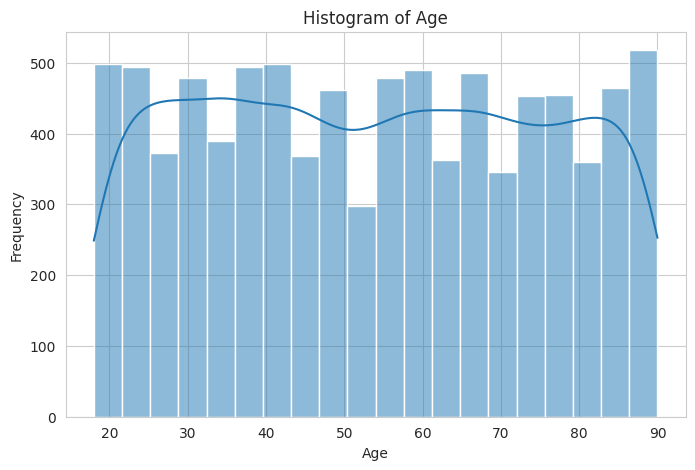

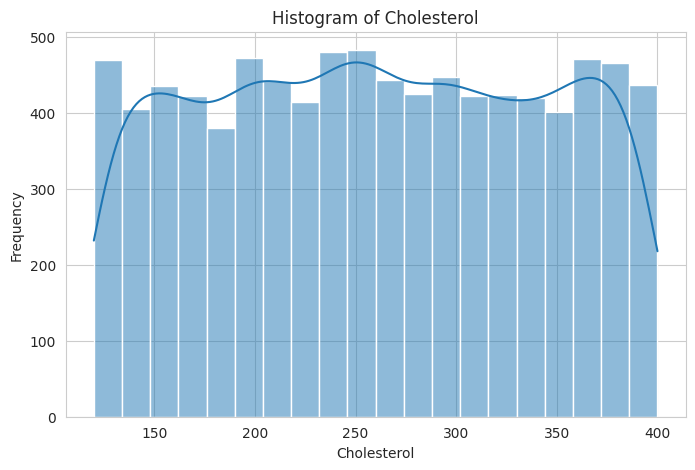

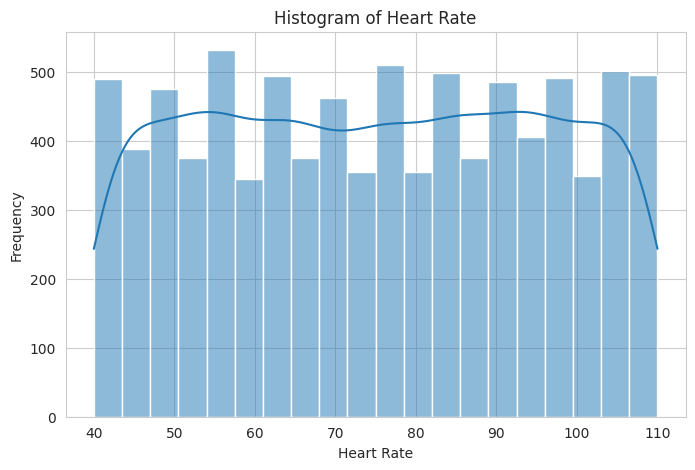

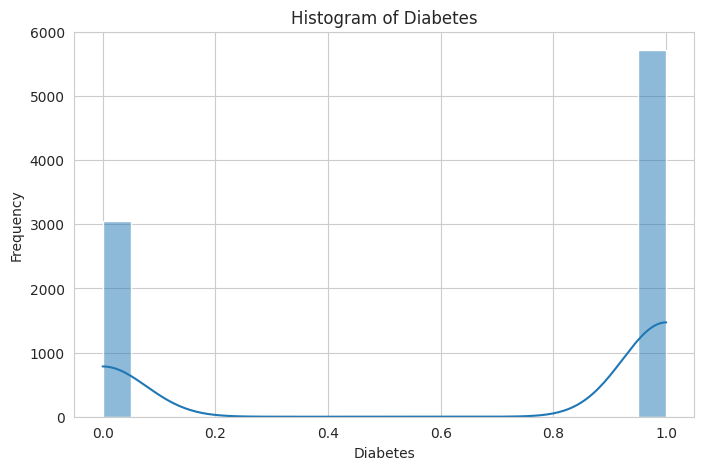

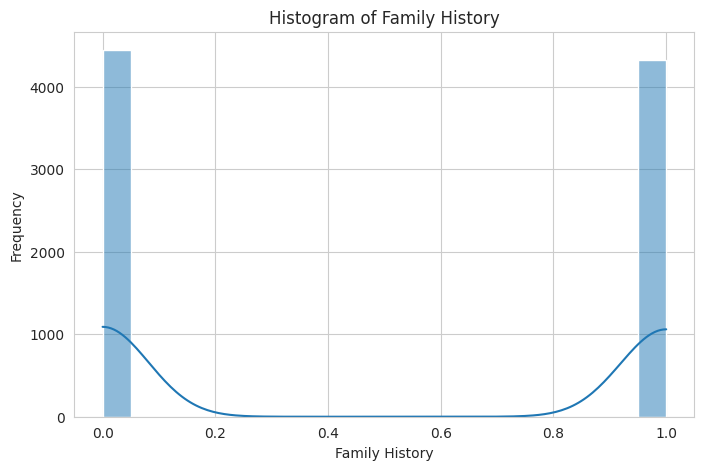

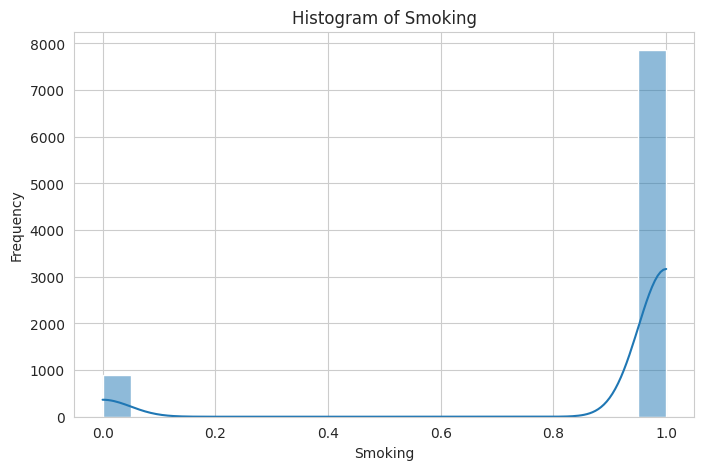

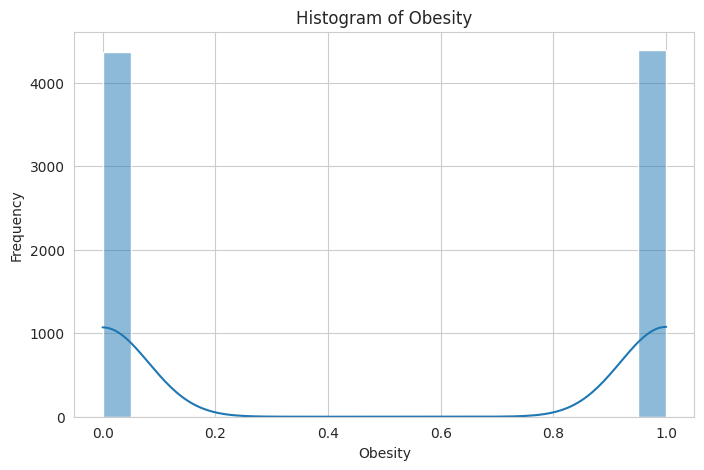

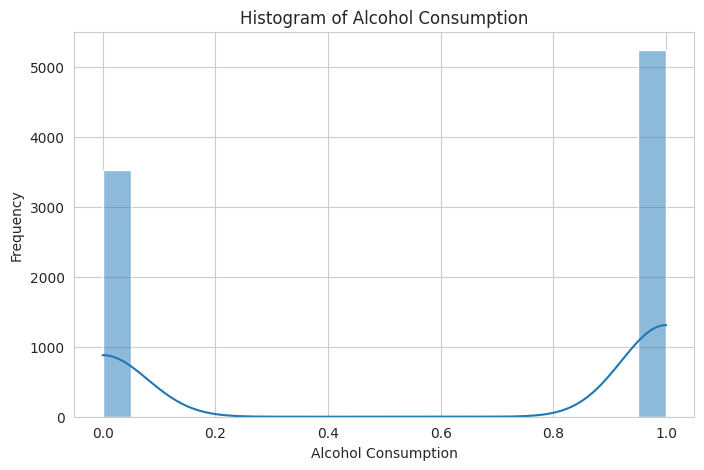

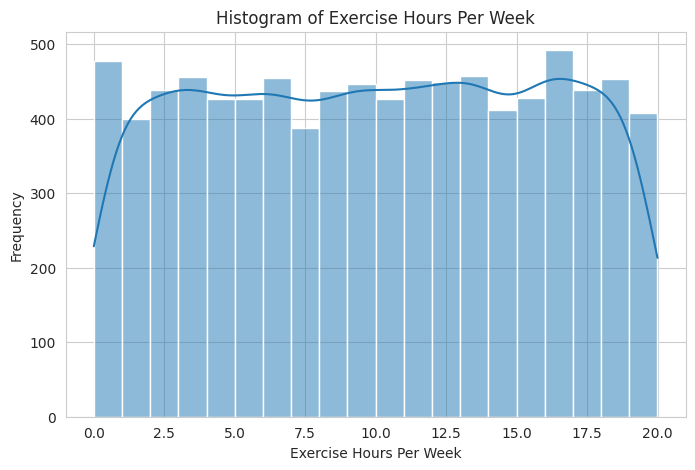

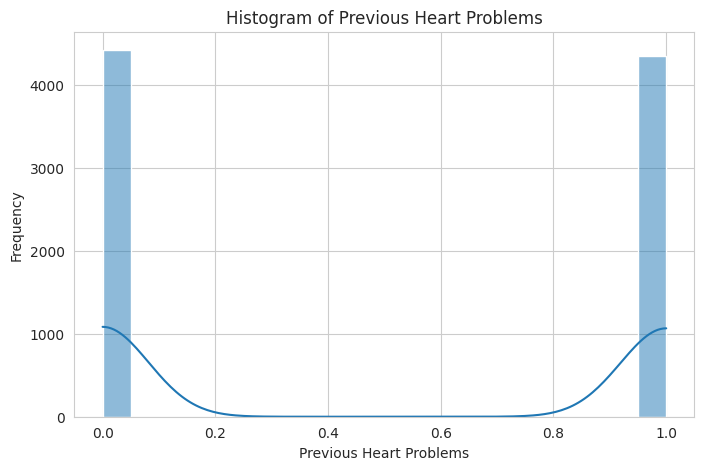

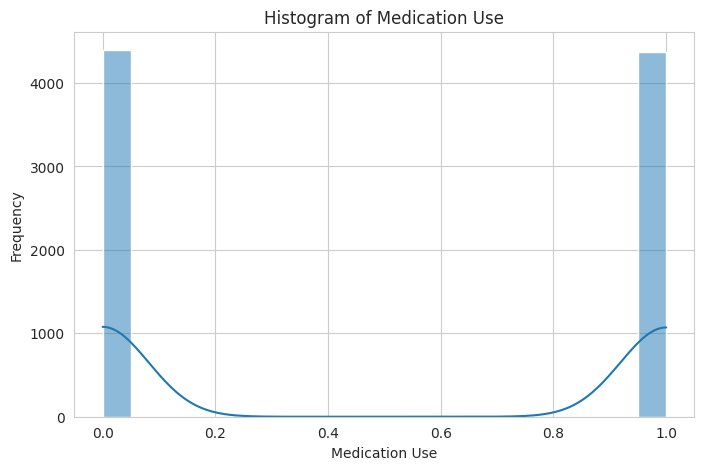

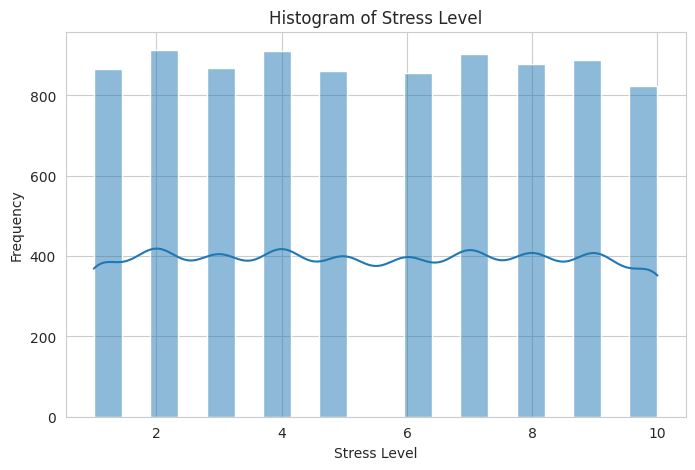

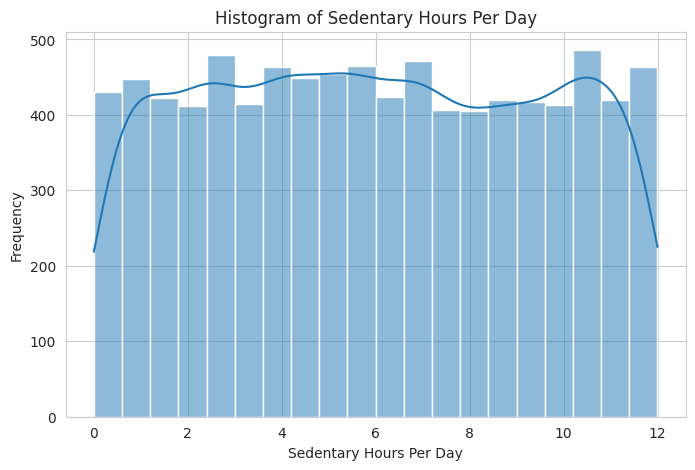

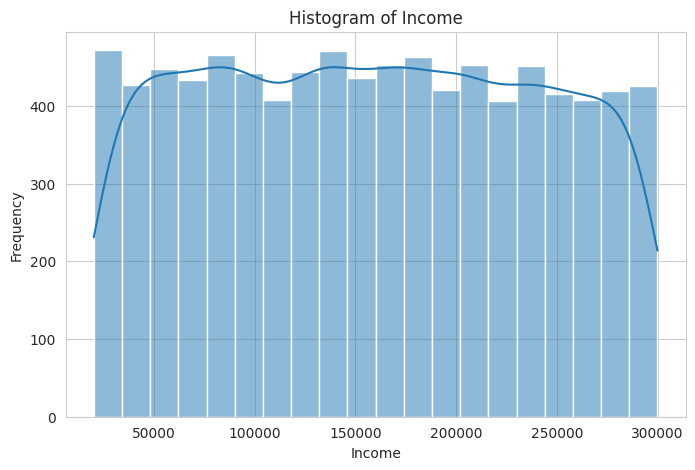

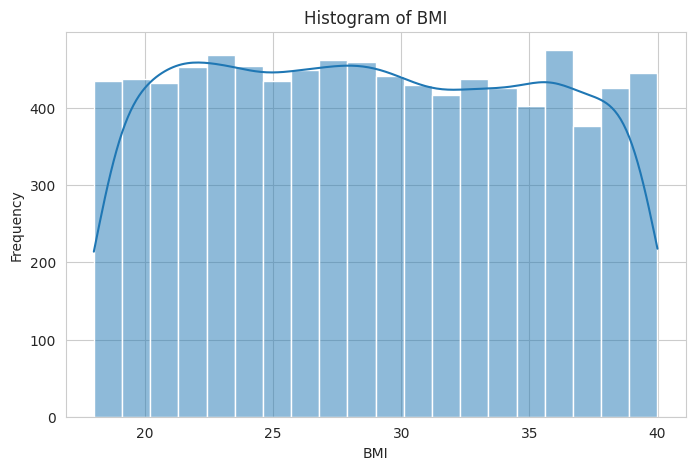

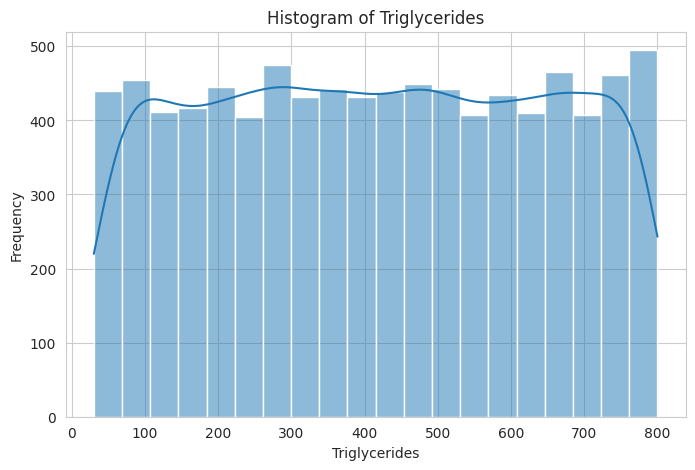

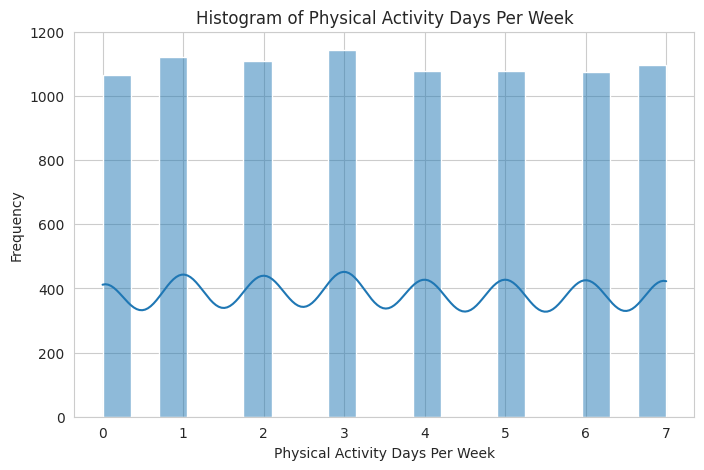

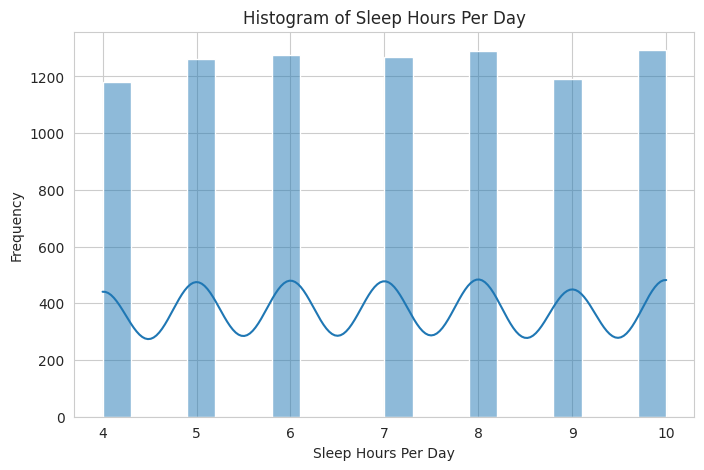

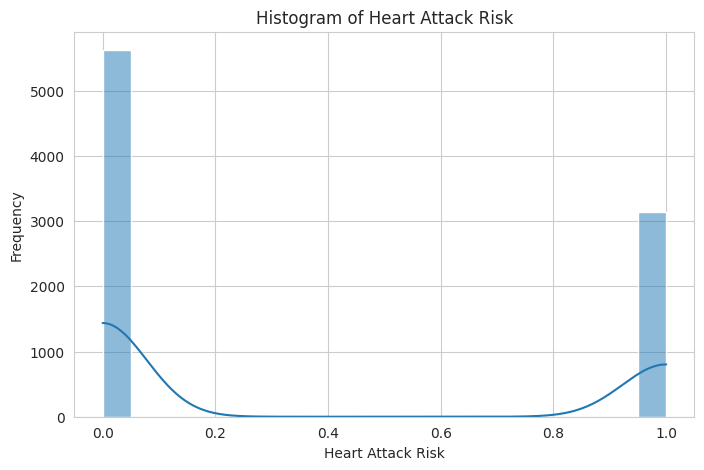

In [ ]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Univariate Analysis: Histograms for numeric variables
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



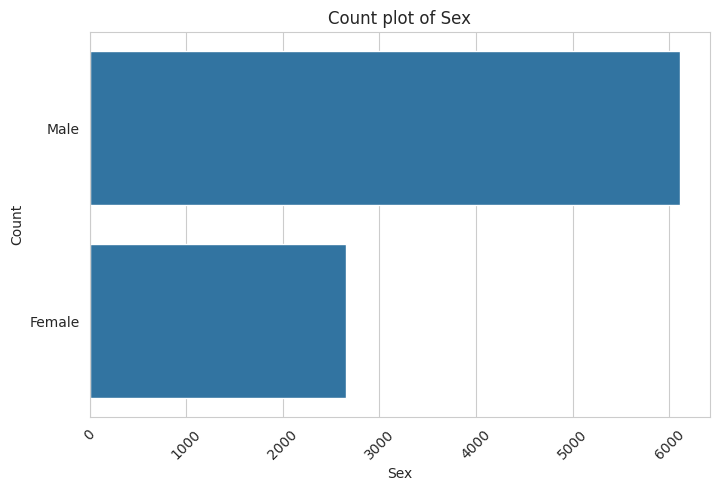

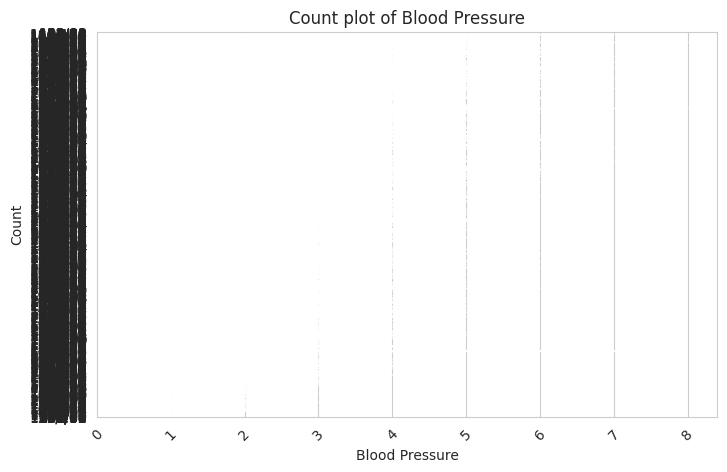

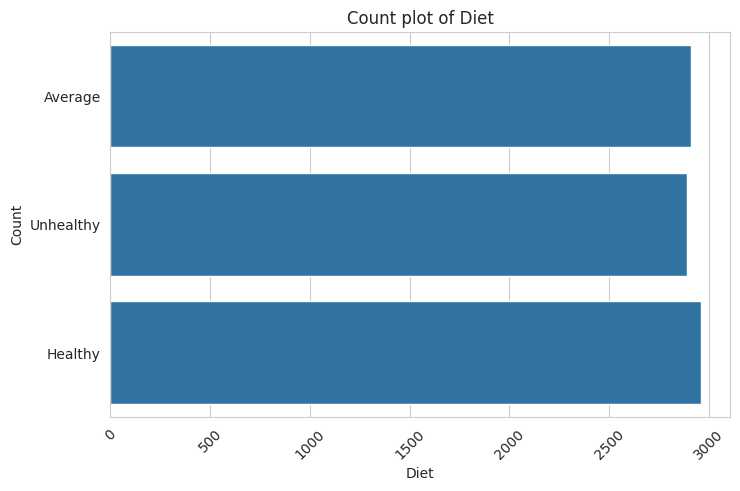

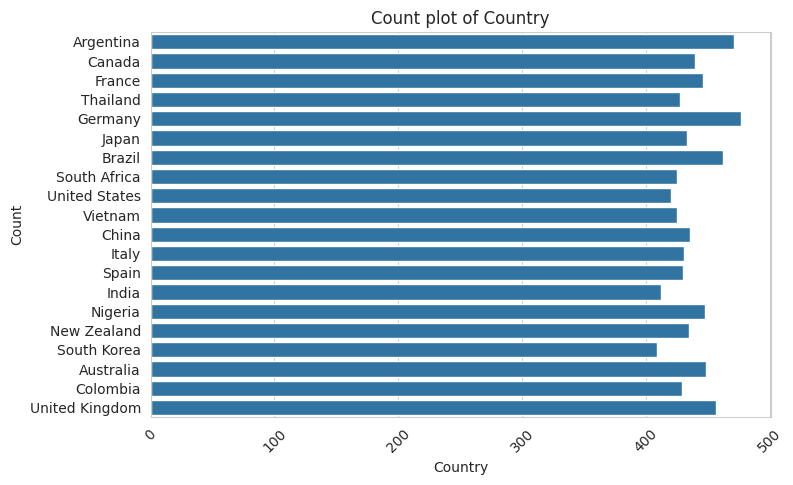

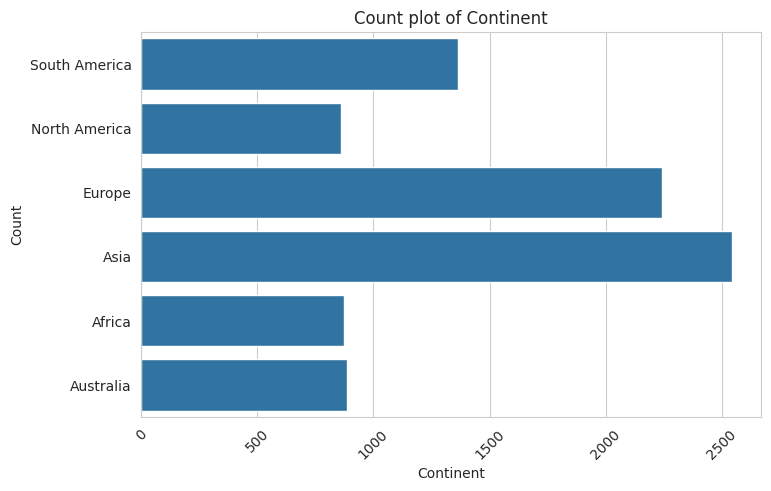

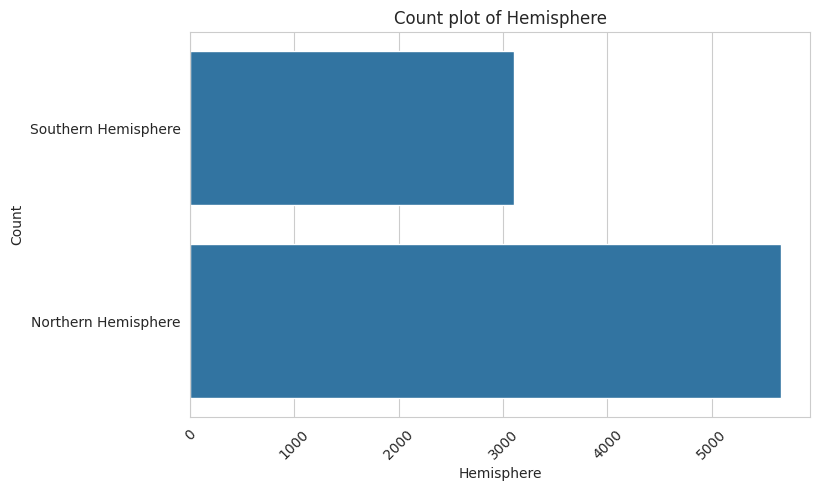

In [ ]:
# Univariate Analysis: Count plots for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data[column])
    plt.title(f'Count plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Copy the original data to avoid modifying the original DataFrame
encoded_data = data.copy()

# Apply label encoding to each categorical column
for column in categorical_columns:
    encoded_data[column] = label_encoder.fit_transform(encoded_data[column])

# Display the first few rows of the encoded data
print("Encoded data:\n", encoded_data.head())


Encoded data:
    Age  Sex  Cholesterol  Blood Pressure  Heart Rate  Diabetes  \
0   67    1          208            2510          72         0   
1   21    1          389            2815          98         1   
2   21    0          324            3224          72         1   
3   84    1          383            2689          73         1   
4   66    1          318            3563          93         1   

   Family History  Smoking  Obesity  Alcohol Consumption  ...  \
0               0        1        0                    0  ...   
1               1        1        1                    1  ...   
2               0        0        0                    0  ...   
3               1        1        0                    1  ...   
4               1        1        1                    0  ...   

   Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0                 6.615001  261404  31.251233            286   
1                 4.963459  285768  27.194973            235   
2    

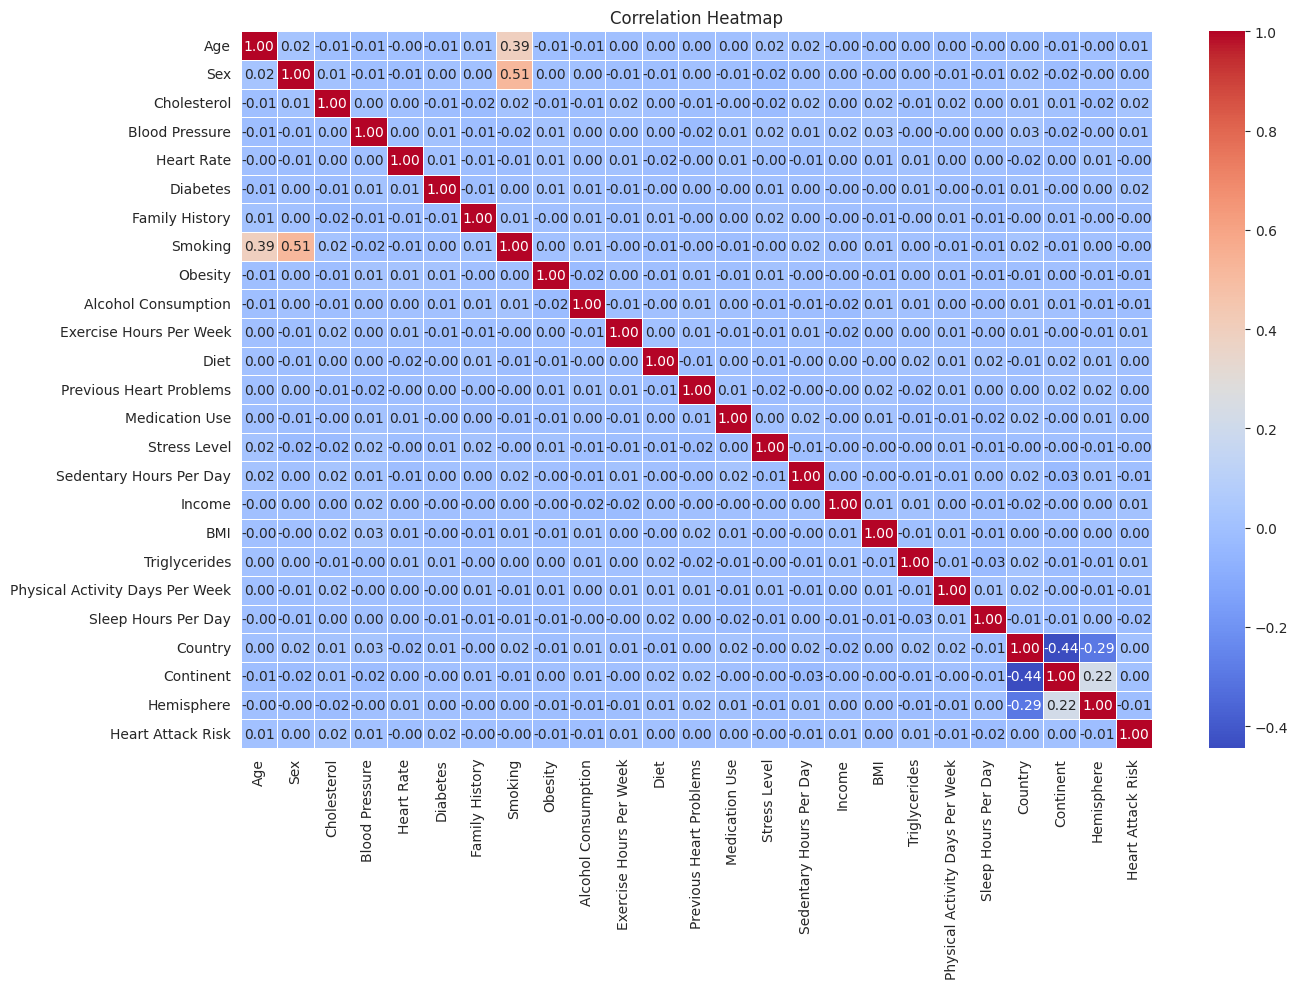

In [ ]:
# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and adjust layout
plt.title('Correlation Heatmap')
plt.tight_layout()

# Display the heatmap
plt.show()


#To elaborate on the correlation between the features and the target column "Heart Attack Risk", we can analyze the values in the correlation matrix:

1. **Positive Correlation**:
   - Features with positive correlation values (between 0 and 1) indicate a positive relationship with the target column. This means that as the values of these features increase, the risk of a heart attack tends to increase as well.
   - For example, features like "Age", "HighBP", "Fruits", and "Veggies" show positive correlations with "Heart Attack Risk". This suggests that individuals with higher age, high blood pressure, and lower consumption of fruits and vegetables are more likely to have a heart attack.

2. **Negative Correlation**:
   - Features with negative correlation values (between -1 and 0) indicate a negative relationship with the target column. This means that as the values of these features increase, the risk of a heart attack tends to decrease.
   - For instance, features like "Fruits" and "Veggies" exhibit negative correlations with "Heart Attack Risk". This implies that individuals who consume more fruits and vegetables tend to have a lower risk of heart attack.

3. **Interpretation**:
   - By analyzing the correlation values, we can identify features that are positively or negatively associated with the risk of a heart attack. This information can be useful for understanding the potential risk factors and developing strategies for prevention.
   - For example, based on the observed correlations, individuals can focus on maintaining a healthy diet rich in fruits and vegetables, managing blood pressure, and adopting a healthy lifestyle to mitigate the risk of heart attack.

4. **Further Analysis**:
   - It's important to note that correlation only indicates a relationship between variables and does not imply causation. Additional analyses, such as statistical tests and causal inference methods, might be needed to establish causal relationships between features and the target column.
   - Additionally, other factors beyond the analyzed features could also influence the risk of heart attack, and further investigation might be required to gain a comprehensive understanding of the underlying factors.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(encoded_data.drop("Heart Attack Risk", axis=1))

# Convert the normalized data array back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=encoded_data.columns[:-1])

# Drop Columns
#normalized_df.drop(['Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_df, encoded_data["Heart Attack Risk"], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train_norm:", X_train.shape)
print("Shape of X_test_norm:", X_test.shape)
print("Shape of y_train_norm:", y_train.shape)
print("Shape of y_test_norm:", y_test.shape)


Shape of X_train_norm: (7010, 24)
Shape of X_test_norm: (1753, 24)
Shape of y_train_norm: (7010,)
Shape of y_test_norm: (1753,)


#Decision Tree

In [ ]:


# Initialize Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)



Decision Tree Accuracy: 0.5436394751853965


Decision Tree Metrics:
Precision: 0.3676923076923077
Recall: 0.38057324840764334
F1 Score: 0.3740219092331769
Confusion Matrix:
 [[714 411]
 [389 239]]


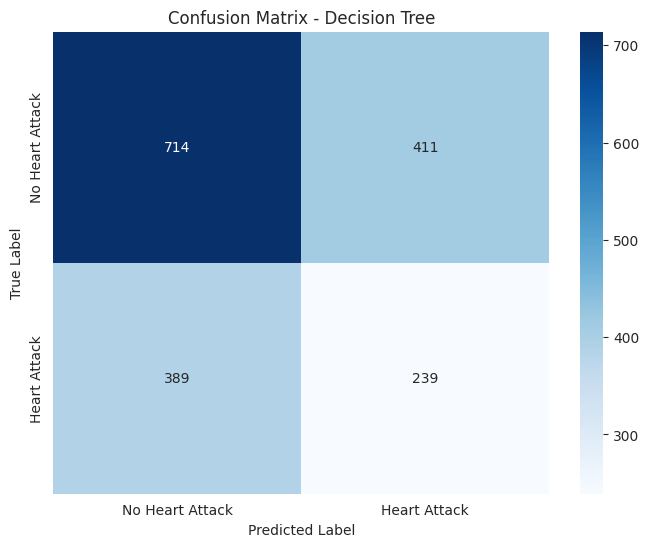

In [ ]:

# Generate confusion matrix


from sklearn.metrics import precision_score, recall_score, f1_score

# Decision Tree Metrics
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Decision Tree Metrics:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

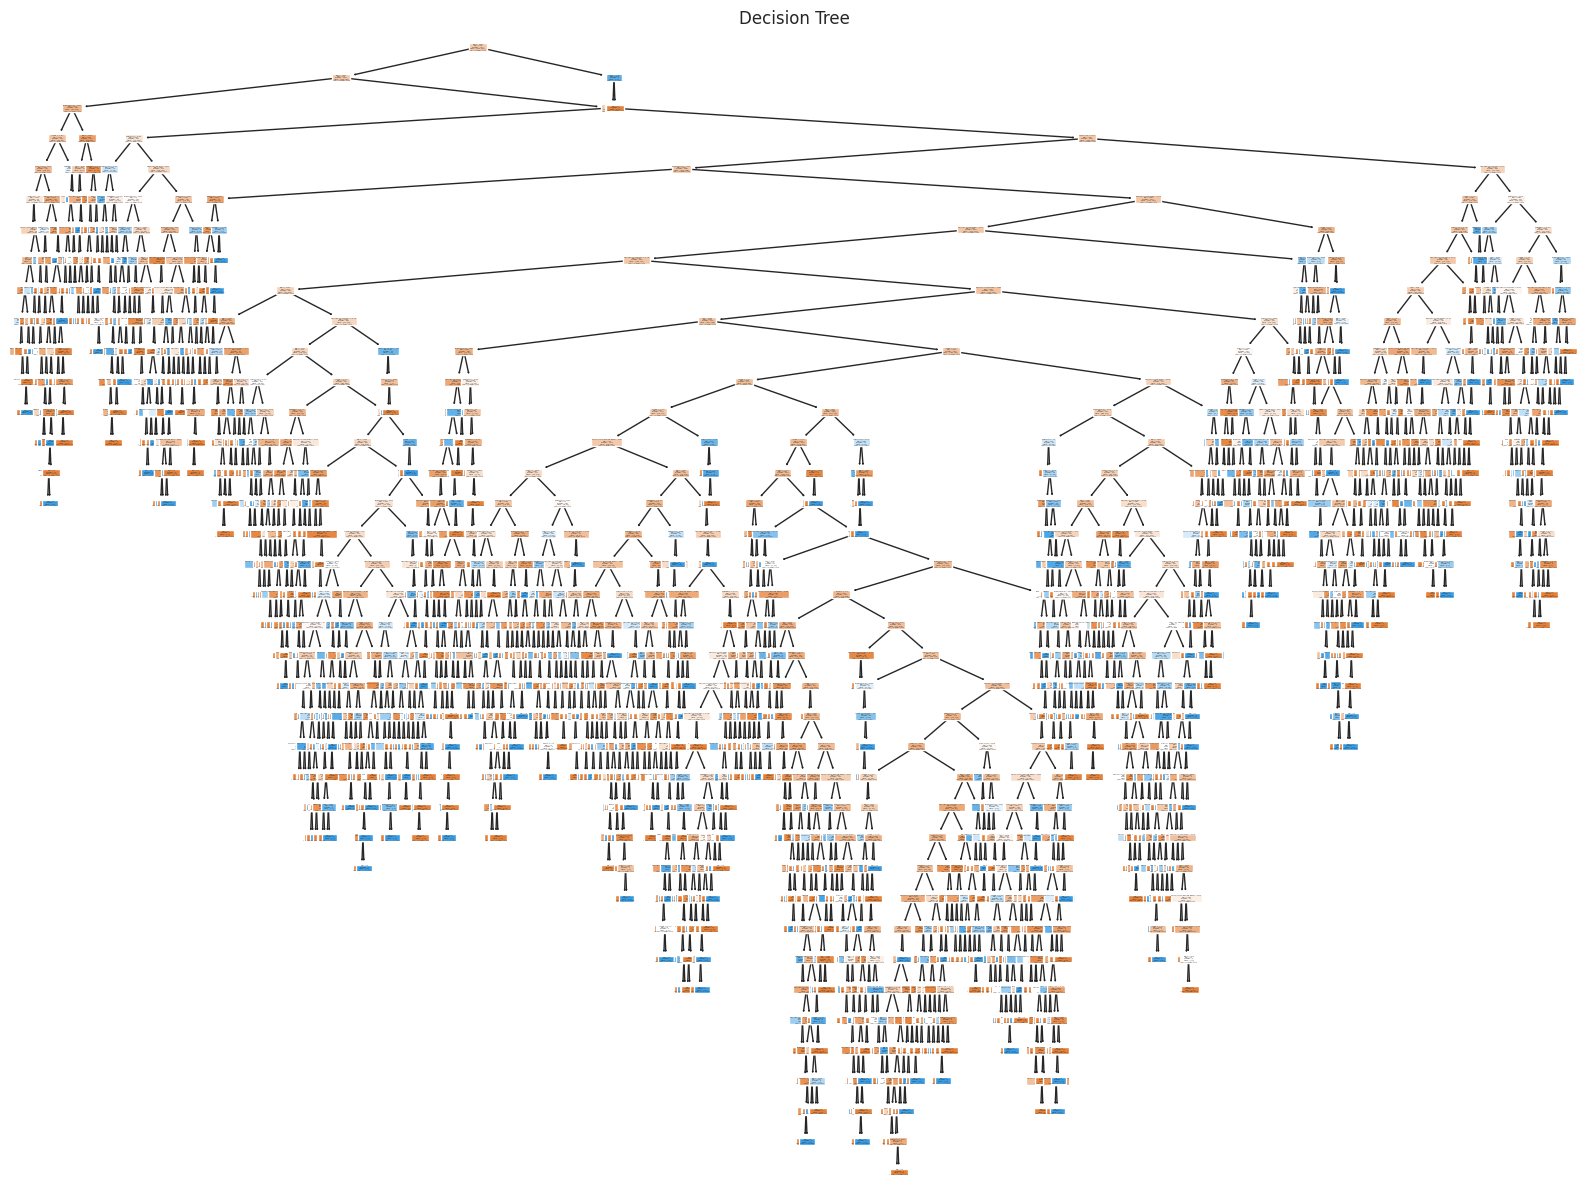

In [ ]:
plt.figure(figsize=(20, 15))
from sklearn.tree import plot_tree
plot_tree(decision_tree, filled=True, feature_names=normalized_df.columns, class_names=['No Heart Attack', 'Heart Attack'])
plt.title("Decision Tree")
plt.show()

#Random Forest

In [ ]:
# Initialize Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.6400456360524814


In [ ]:
# Random Forest Metrics
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix - Random Forest:\n", conf_matrix_rf)
print("\nRandom Forest Metrics:")
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Confusion Matrix - Random Forest:
 [[1105   20]
 [ 611   17]]

Random Forest Metrics:
Precision: 0.4594594594594595
Recall: 0.027070063694267517
F1 Score: 0.05112781954887218


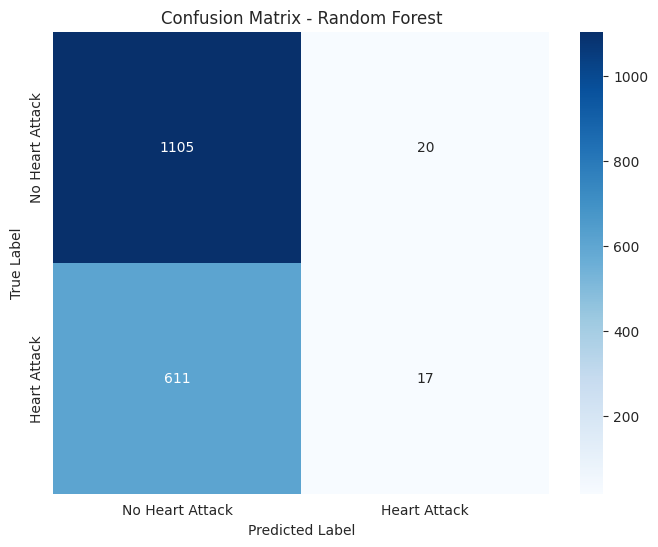

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='d', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=42)

# Train the classifier on the normalized training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lr = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.6417569880205363


Confusion Matrix - Logistic Regression:
 [[1125    0]
 [ 628    0]]


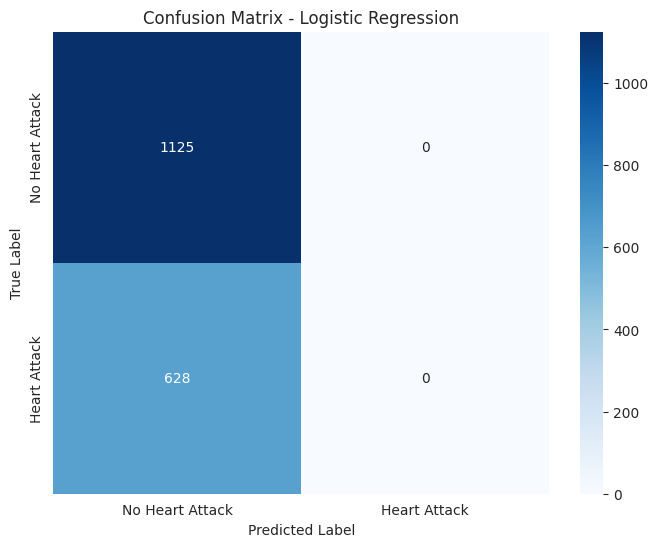

In [ ]:
# Generate confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix - Logistic Regression:\n", conf_matrix_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d', xticklabels=['No Heart Attack', 'Heart Attack'], yticklabels=['No Heart Attack', 'Heart Attack'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import statsmodels.api as sm

# Fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the OLS report
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.651638
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:      Heart Attack Risk   No. Observations:                 7010
Model:                          Logit   Df Residuals:                     6986
Method:                           MLE   Df Model:                           23
Date:                Tue, 14 May 2024   Pseudo R-squ.:                0.001133
Time:                        10:09:01   Log-Likelihood:                -4568.0
converged:                       True   LL-Null:                       -4573.2
Covariance Type:            nonrobust   LLR p-value:                    0.9888
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Age                                 0.0932      0.094      0.987  

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize BalancedRandomForestClassifier
balanced_rf = BalancedRandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(balanced_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
best_balanced_rf = BalancedRandomForestClassifier(**best_params, random_state=42)
best_balanced_rf.fit(X_train, y_train)

# Make predictions
y_pred_best_balanced_rf = best_balanced_rf.predict(X_test)

# Evaluate the model
accuracy_best_balanced_rf = accuracy_score(y_test, y_pred_best_balanced_rf)
print("Best Balanced Random Forest Accuracy:", accuracy_best_balanced_rf)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.5276747503566334
Best Balanced Random Forest Accuracy: 0.5265259555048488
